In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from csv import reader
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import sys
print(sys.version)

3.5.2 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


To test our hypothesis of whether or not there is a correlation between the number of residential noise complaints and the number of vehicle collisions we first had to extract the necesary information from the data set provide by the NYPD on vehicle collisions.

Similar to Hypothesis 1 we start of by counting the number of residnetial noise complaints and group the them by the "created date" column in the 311 data set. Then we counted the number of vehicle collisons and grouped them by the "DATE" column in the NYPD vehicle collisions. The we proceeded to combine the two counts we extracted by date.

Once the counts were combined we implemented the same method as we did Hypothesis 1 to find bounds where outliers/unexpected values should be.

We found that no data points fell below the lower bound we created based off of the quartiles. We also notice that they are little to no correlation between the number of residential complaints and the number of vehicle collisions which can be seen by the graphs below.

In [22]:
noise_comp_crash =  pd.read_csv("noise_complaints_crash.out",
                                names = ["date", "num_complaints", "num_collisions", "state"])

In [3]:
noise_comp_crash["date"] = pd.to_datetime(noise_comp_crash['date'], format='%Y%m%d').dt.date

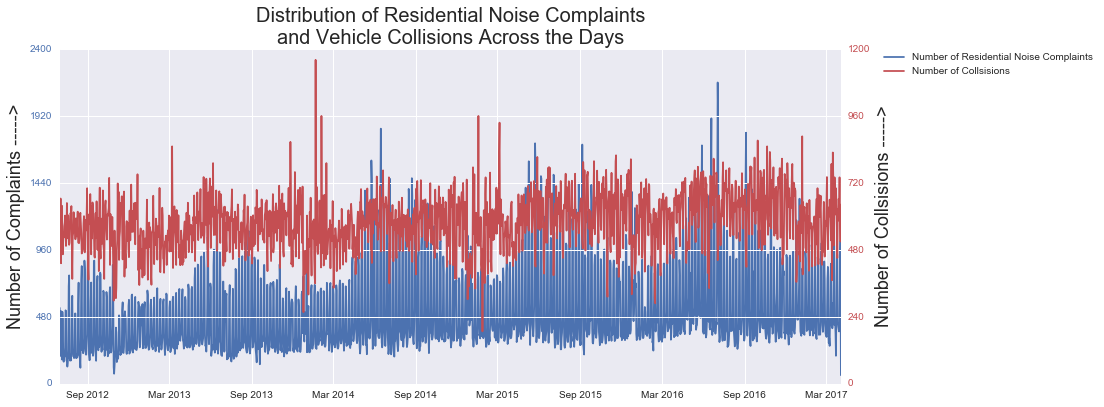

In [4]:
fig, ax1 = plt.subplots(figsize=(14, 6))  

title = ('Distribution of Residential Noise Complaints'
         '\nand Vehicle Collisions Across the Days')
plt.title(title, fontsize=20)

g1 = ax1.plot(noise_comp_crash.date, noise_comp_crash.num_complaints, 'b',
              label='Number of Residential Noise Complaints')

ax1.set_ylabel('Number of Complaints ----->', fontsize=18)
ax1.set_ylim(0, 2400)
for i in ax1.get_yticklabels():
    i.set_color('b')

ax2 = ax1.twinx()
g2 = ax2.plot(noise_comp_crash.date, noise_comp_crash.num_collisions, 'r',
              label='Number of Collsisions')

ax2.set_ylabel('Number of Collsisions ----->', fontsize=18)
ax2.set_ylim(0, 1200)
for i in ax2.get_yticklabels():
    i.set_color('r')
    
lines = g1 + g2
ax1.legend(lines, [l.get_label() for l in lines],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))

plt.show()
fig.savefig("Noise_and_Crashes.jpg")

The distribution of the number of daily vehicle collisions seems to be that of a Normal distribution and appears to be unrelated to that of the distribution of daily residential noise complaints. 

/Users/stormross/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


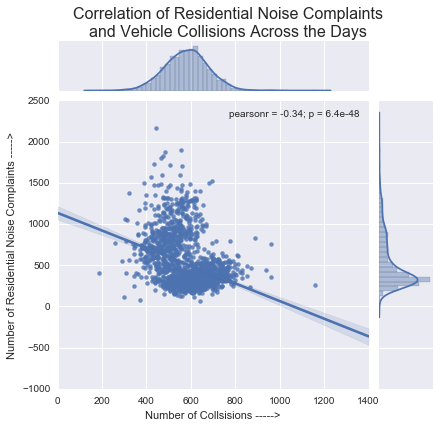

In [5]:
title = ('Correlation of Residential Noise Complaints'
         '\nand Vehicle Collisions Across the Days')
g = sns.jointplot(x="num_collisions", y="num_complaints", data=noise_comp_crash, kind='reg')
g.fig.suptitle(title, fontsize=16)
g.fig.subplots_adjust(top=.9)
g.ax_joint.set_xlabel("Number of Collsisions ----->")
g.ax_joint.set_ylabel("Number of Residential Noise Complaints ----->")
g.savefig("Noise_and_Crashes_Corr.jpg")

From the summary file generated by the script used to combine the counts we also created the following summary of the daily number of residnetial complaints.

In [6]:
noise_comp_crash_summary = pd.read_csv("noise_complaints_crash_summary.out", sep =":",
                                       names = ["Statistics", "Value"])
noise_comp_crash_summary

,Statistics,Value
0,min_num_complaints,0.00
1,quartile_1_num_complaints,248.00
2,median_num_complaints,342.00
3,quartile_3_num_complaints,520.00
4,max_num_complaints,2160.00
5,correlation_score_num_complaints_crash,-0.34


From the above summary we can see that correlation (Pearson's coefficent) between the daily number of residential noise complaints and the daily number of vehicle collisions is -0.34 which implies a small negative correlation between these two attributes. Although there is a correlation it is not a very strong one and might even just be coincidence.

From the plots and the correlation score between the daily number of residential noise complaints and the daily number of vehicle collisions we have come to the conclusion that our hypothesis is false.

In [7]:
sw_noise_comp_crash =  pd.read_csv("noise_complaints_crash_sw.out",
                                names = ["date", "num_complaints", "num_collisions", "state"])
sw_noise_comp_crash["date"] = pd.to_datetime(sw_noise_comp_crash['date'], format='%Y%m%d').dt.date

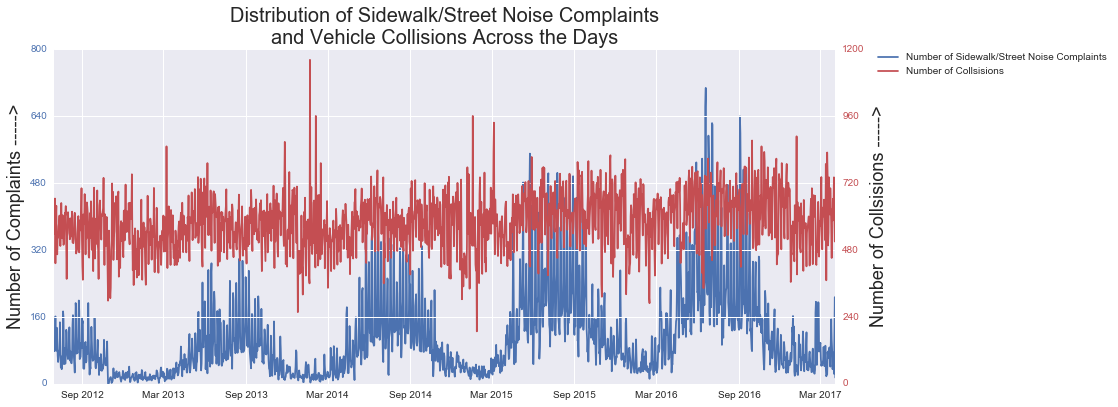

In [8]:
fig_sw, ax1 = plt.subplots(figsize=(14, 6))  

title = ('Distribution of Sidewalk/Street Noise Complaints'
         '\nand Vehicle Collisions Across the Days')
plt.title(title, fontsize=20)

g1_sw = ax1.plot(sw_noise_comp_crash.date, sw_noise_comp_crash.num_complaints, 'b',
              label='Number of Sidewalk/Street Noise Complaints')

ax1.set_ylabel('Number of Complaints ----->', fontsize=18)
ax1.set_ylim(0, 800)
for i in ax1.get_yticklabels():
    i.set_color('b')

ax2 = ax1.twinx()
g2_sw = ax2.plot(sw_noise_comp_crash.date, sw_noise_comp_crash.num_collisions, 'r',
              label='Number of Collsisions')

ax2.set_ylabel('Number of Collsisions ----->', fontsize=18)
ax2.set_ylim(0, 1200)
for i in ax2.get_yticklabels():
    i.set_color('r')
    
lines = g1_sw + g2_sw
ax1.legend(lines, [l.get_label() for l in lines],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))

plt.show()
fig_sw.savefig("SW_Noise_and_Crashes.jpg")

/Users/stormross/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


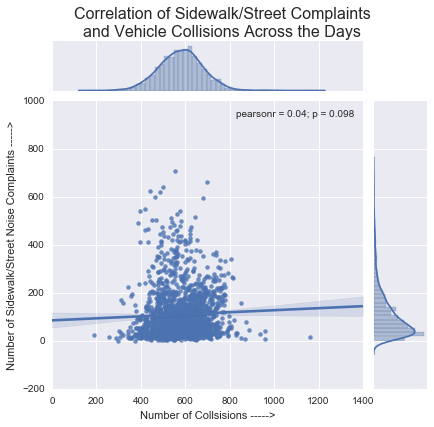

In [9]:
title = ('Correlation of Sidewalk/Street Complaints'
         '\nand Vehicle Collisions Across the Days')
g_sw = sns.jointplot(x="num_collisions", y="num_complaints", data=sw_noise_comp_crash,
                     kind='reg')
g_sw.fig.suptitle(title, fontsize=16)
g_sw.fig.subplots_adjust(top=.9)
g_sw.ax_joint.set_xlabel("Number of Collsisions ----->")
g_sw.ax_joint.set_ylabel("Number of Sidewalk/Street Noise Complaints ----->")
g_sw.savefig("SW_Noise_and_Crashes_Corr.jpg")

In [10]:
sw_noise_comp_crash_summary = pd.read_csv("noise_complaints_crash_sw_summary.out", sep =":",
                                       names = ["Statistics", "Value"])
sw_noise_comp_crash_summary

,Statistics,Value
0,min_num_complaints,0.00
1,quartile_1_num_complaints,27.00
2,median_num_complaints,58.00
3,quartile_3_num_complaints,113.00
4,max_num_complaints,707.00
5,correlation_score_num_complaints_crash,0.04


In [11]:
veh_noise_comp_crash =  pd.read_csv("noise_complaints_crash_veh.out",
                                names = ["date", "num_complaints", "num_collisions", "state"])
veh_noise_comp_crash["date"] = pd.to_datetime(veh_noise_comp_crash['date'], format='%Y%m%d').dt.date

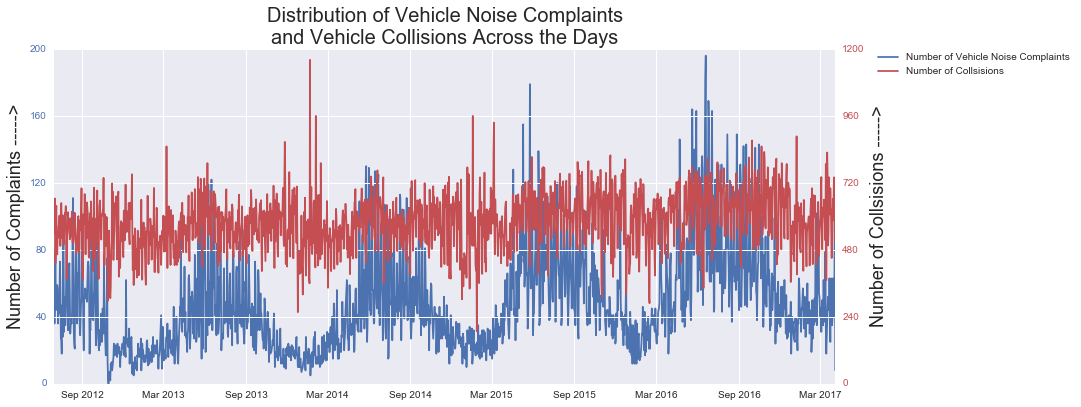

In [12]:
fig_veh, ax1 = plt.subplots(figsize=(14, 6))  

title = ('Distribution of Vehicle Noise Complaints'
         '\nand Vehicle Collisions Across the Days')
plt.title(title, fontsize=20)

g1_veh = ax1.plot(veh_noise_comp_crash.date, veh_noise_comp_crash.num_complaints, 'b',
              label='Number of Vehicle Noise Complaints')

ax1.set_ylabel('Number of Complaints ----->', fontsize=18)
ax1.set_ylim(0, 200)
for i in ax1.get_yticklabels():
    i.set_color('b')

ax2 = ax1.twinx()
g2_veh = ax2.plot(veh_noise_comp_crash.date, veh_noise_comp_crash.num_collisions, 'r',
              label='Number of Collsisions')

ax2.set_ylabel('Number of Collsisions ----->', fontsize=18)
ax2.set_ylim(0, 1200)
for i in ax2.get_yticklabels():
    i.set_color('r')
    
lines = g1_veh + g2_veh
ax1.legend(lines, [l.get_label() for l in lines],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))

plt.show()
fig_veh.savefig("VEH_Noise_and_Crashes.jpg")

/Users/stormross/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


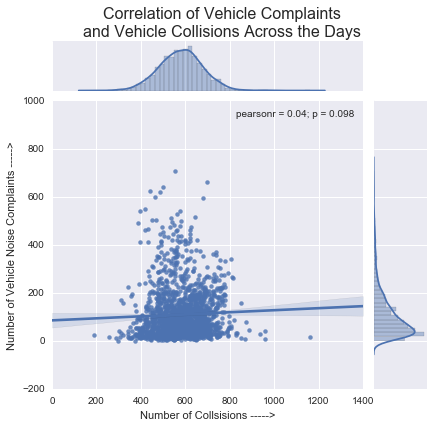

In [13]:
title = ('Correlation of Vehicle Complaints'
         '\nand Vehicle Collisions Across the Days')
g_veh = sns.jointplot(x="num_collisions", y="num_complaints", data=sw_noise_comp_crash,
                     kind='reg')
g_veh.fig.suptitle(title, fontsize=16)
g_veh.fig.subplots_adjust(top=.9)
g_veh.ax_joint.set_xlabel("Number of Collsisions ----->")
g_veh.ax_joint.set_ylabel("Number of Vehicle Noise Complaints ----->")
g_veh.savefig("VEH_Noise_and_Crashes_Corr.jpg")

In [14]:
veh_noise_comp_crash_summary = pd.read_csv("noise_complaints_crash_veh_summary.out", sep =":",
                                       names = ["Statistics", "Value"])
veh_noise_comp_crash_summary

,Statistics,Value
0,min_num_complaints,0.00
1,quartile_1_num_complaints,23.00
2,median_num_complaints,36.00
3,quartile_3_num_complaints,56.00
4,max_num_complaints,196.00
5,correlation_score_num_complaints_crash,0.15


In [15]:
res_noise_comp_crash_boro = pd.read_csv("res_noise_crash_boro.out",
                                        names = ["borough", "residential_comp", "collisions"])
res_noise_comp_crash_boro.collisions = (res_noise_comp_crash_boro.collisions/
                                       sum(res_noise_comp_crash_boro.collisions))
res_noise_comp_crash_boro.residential_comp = (res_noise_comp_crash_boro.residential_comp/
                                       sum(res_noise_comp_crash_boro.residential_comp))
res_noise_comp_crash_boro

,borough,residential_comp,collisions
0,MANHATTAN,0.227165,0.256117
1,QUEENS,0.192642,0.259822
2,STATEN ISLAND,0.028807,0.046400
3,BROOKLYN,0.303357,0.306370
4,BRONX,0.248029,0.131292


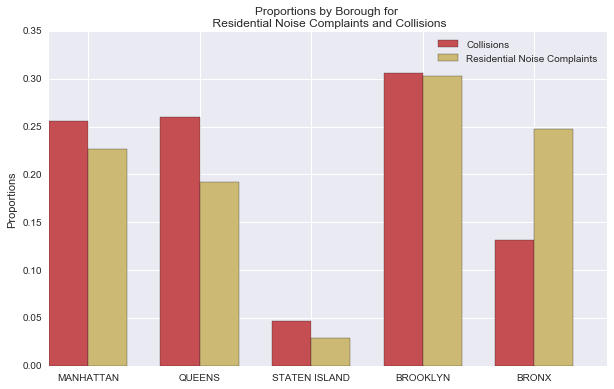

In [39]:
ind = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(ind, res_noise_comp_crash_boro.collisions, width, color='r')
rects2 = ax.bar(ind + width, res_noise_comp_crash_boro.residential_comp, width, color='y')

ax.set_ylabel('Proportions')
ax.set_title('Proportions by Borough for \n Residential Noise Complaints and Collisions')
ax.set_xticks(ind + width )
ax.set_xticklabels(res_noise_comp_crash_boro.borough)
ax.legend((rects1[0], rects2[0]), ('Collisions', 'Residential Noise Complaints'))

In [17]:
sw_noise_comp_crash_boro = pd.read_csv("sw_noise_crash_boro.out",
                                        names = ["borough", "street_comp", "collisions"])
sw_noise_comp_crash_boro.collisions = (sw_noise_comp_crash_boro.collisions/
                                       sum(sw_noise_comp_crash_boro.collisions))
sw_noise_comp_crash_boro.street_comp = (sw_noise_comp_crash_boro.street_comp/
                                       sum(sw_noise_comp_crash_boro.street_comp))

sw_noise_comp_crash_boro

,borough,street_comp,collisions
0,MANHATTAN,0.432062,0.256117
1,QUEENS,0.106293,0.259822
2,STATEN ISLAND,0.017037,0.046400
3,BROOKLYN,0.266658,0.306370
4,BRONX,0.177950,0.131292


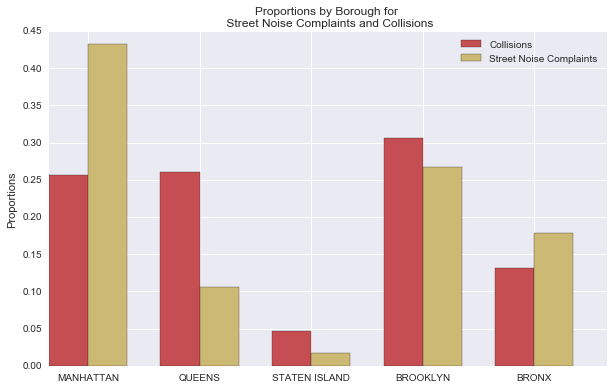

In [40]:
ind = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(ind, sw_noise_comp_crash_boro.collisions, width, color='r')
rects2 = ax.bar(ind + width, sw_noise_comp_crash_boro.street_comp, width, color='y')

ax.set_ylabel('Proportions')
ax.set_title('Proportions by Borough for \n Street Noise Complaints and Collisions')
ax.set_xticks(ind + width )
ax.set_xticklabels(sw_noise_comp_crash_boro.borough)
ax.legend((rects1[0], rects2[0]), ('Collisions', 'Street Noise Complaints'))

In [19]:
veh_noise_comp_crash_boro = pd.read_csv("veh_noise_crash_boro.out",
                                        names = ["borough", "vehicle_comp", "collisions"])
veh_noise_comp_crash_boro.collisions = (veh_noise_comp_crash_boro.collisions/
                                       sum(veh_noise_comp_crash_boro.collisions))
veh_noise_comp_crash_boro.vehicle_comp = (veh_noise_comp_crash_boro.vehicle_comp/
                                       sum(veh_noise_comp_crash_boro.vehicle_comp))
veh_noise_comp_crash_boro

,borough,vehicle_comp,collisions
0,MANHATTAN,0.342110,0.256117
1,QUEENS,0.159133,0.259822
2,STATEN ISLAND,0.024805,0.046400
3,BROOKLYN,0.309249,0.306370
4,BRONX,0.164702,0.131292


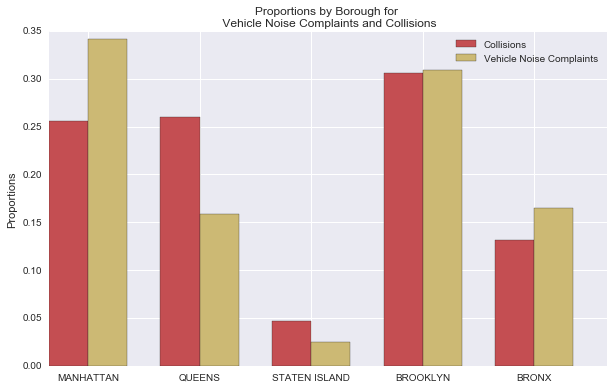

In [41]:
ind = np.arange(5)
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(ind, veh_noise_comp_crash_boro.collisions, width, color='r')
rects2 = ax.bar(ind + width, veh_noise_comp_crash_boro.vehicle_comp, width, color='y')

ax.set_ylabel('Proportions')
ax.set_title('Proportions by Borough for \n Vehicle Noise Complaints and Collisions')
ax.set_xticks(ind + width )
ax.set_xticklabels(veh_noise_comp_crash_boro.borough)
ax.legend((rects1[0], rects2[0]), ('Collisions', 'Vehicle Noise Complaints'))

Since Brooklyn is the only borough that had same proportion of complaints as collisions so lets take a closer look at the complaints and collisions in Brooklyn.

In [27]:
brooklyn_dist_res =  pd.read_csv("brooklyn/brooklyn_dist_res.out",
                                names = ["date", "num_complaints", "num_collisions", "state"])
brooklyn_dist_res["date"] = pd.to_datetime(brooklyn_dist_res['date'], format='%Y%m%d').dt.date

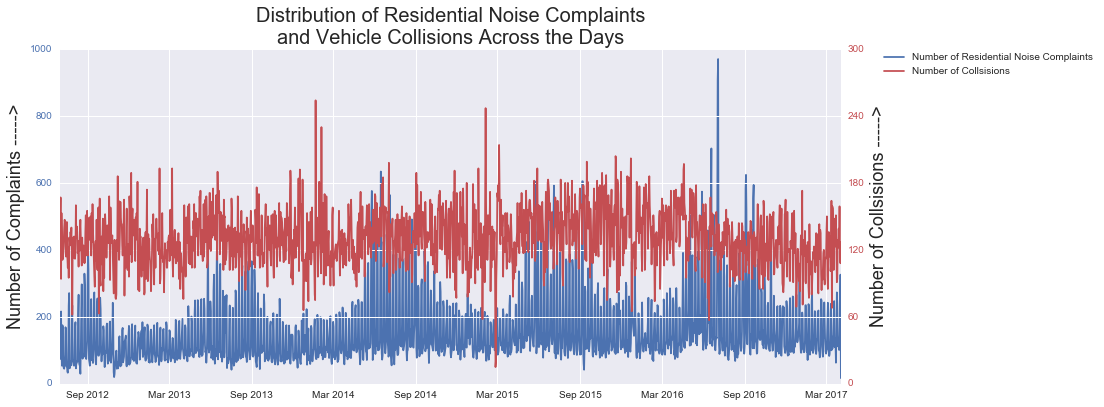

In [28]:
fig, ax1 = plt.subplots(figsize=(14, 6))  

title = ('Distribution of Residential Noise Complaints'
         '\nand Vehicle Collisions Across the Days')
plt.title(title, fontsize=20)

g1 = ax1.plot(brooklyn_dist_res.date, brooklyn_dist_res.num_complaints, 'b',
              label='Number of Residential Noise Complaints')

ax1.set_ylabel('Number of Complaints ----->', fontsize=18)
ax1.set_ylim(0, 1000)
for i in ax1.get_yticklabels():
    i.set_color('b')

ax2 = ax1.twinx()
g2 = ax2.plot(brooklyn_dist_res.date, brooklyn_dist_res.num_collisions, 'r',
              label='Number of Collsisions')

ax2.set_ylabel('Number of Collsisions ----->', fontsize=18)
ax2.set_ylim(0, 300)
for i in ax2.get_yticklabels():
    i.set_color('r')
    
lines = g1 + g2
ax1.legend(lines, [l.get_label() for l in lines],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))

plt.show()

/Users/stormross/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


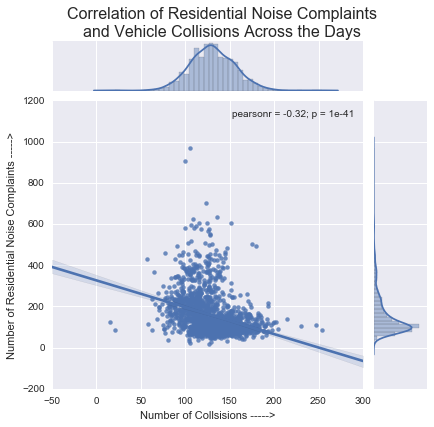

In [26]:
title = ('Correlation of Residential Noise Complaints'
         '\nand Vehicle Collisions Across the Days')
g = sns.jointplot(x="num_collisions", y="num_complaints", data=brooklyn_dist_res, kind='reg')
g.fig.suptitle(title, fontsize=16)
g.fig.subplots_adjust(top=.9)
g.ax_joint.set_xlabel("Number of Collsisions ----->")
g.ax_joint.set_ylabel("Number of Residential Noise Complaints ----->")

In [30]:
brooklyn_dist_sw =  pd.read_csv("brooklyn/brooklyn_dist_sw.out",
                                names = ["date", "num_complaints", "num_collisions", "state"])
brooklyn_dist_sw["date"] = pd.to_datetime(brooklyn_dist_sw['date'], format='%Y%m%d').dt.date

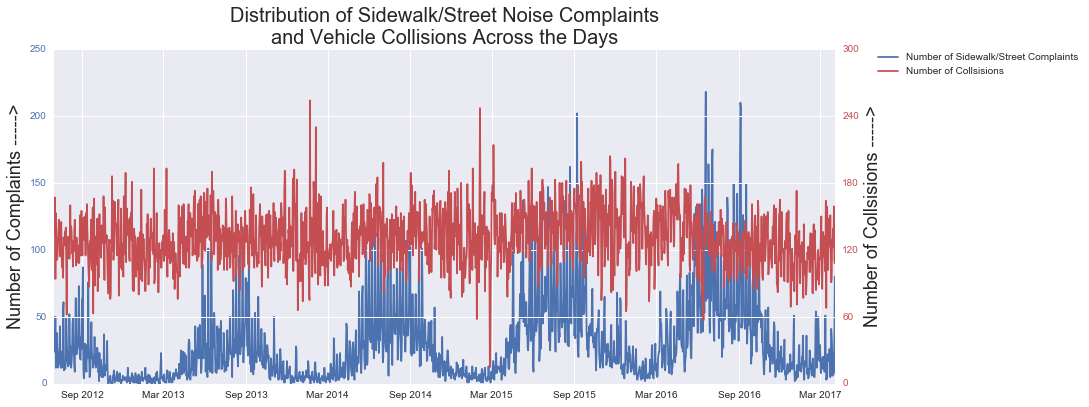

In [33]:
fig, ax1 = plt.subplots(figsize=(14, 6))  

title = ('Distribution of Sidewalk/Street Noise Complaints'
         '\nand Vehicle Collisions Across the Days')
plt.title(title, fontsize=20)

g1 = ax1.plot(brooklyn_dist_sw.date, brooklyn_dist_sw.num_complaints, 'b',
              label='Number of Sidewalk/Street Complaints')

ax1.set_ylabel('Number of Complaints ----->', fontsize=18)
ax1.set_ylim(0, 250)
for i in ax1.get_yticklabels():
    i.set_color('b')

ax2 = ax1.twinx()
g2 = ax2.plot(brooklyn_dist_sw.date, brooklyn_dist_sw.num_collisions, 'r',
              label='Number of Collsisions')

ax2.set_ylabel('Number of Collsisions ----->', fontsize=18)
ax2.set_ylim(0, 300)
for i in ax2.get_yticklabels():
    i.set_color('r')
    
lines = g1 + g2
ax1.legend(lines, [l.get_label() for l in lines],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))

plt.show()

/Users/stormross/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


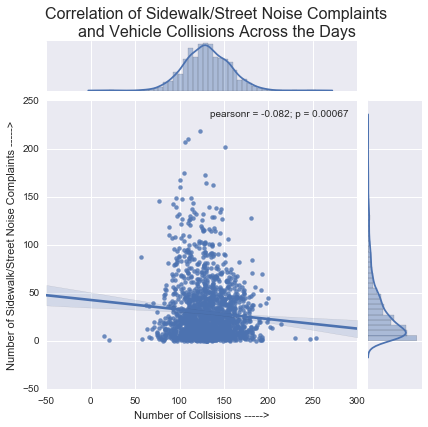

In [34]:
title = ('Correlation of Sidewalk/Street Noise Complaints'
         '\nand Vehicle Collisions Across the Days')
g = sns.jointplot(x="num_collisions", y="num_complaints", data=brooklyn_dist_sw, kind='reg')
g.fig.suptitle(title, fontsize=16)
g.fig.subplots_adjust(top=.9)
g.ax_joint.set_xlabel("Number of Collsisions ----->")
g.ax_joint.set_ylabel("Number of Sidewalk/Street Noise Complaints ----->")

In [35]:
brooklyn_dist_veh =  pd.read_csv("brooklyn/brooklyn_dist_veh.out",
                                names = ["date", "num_complaints", "num_collisions", "state"])
brooklyn_dist_veh["date"] = pd.to_datetime(brooklyn_dist_veh['date'], format='%Y%m%d').dt.date

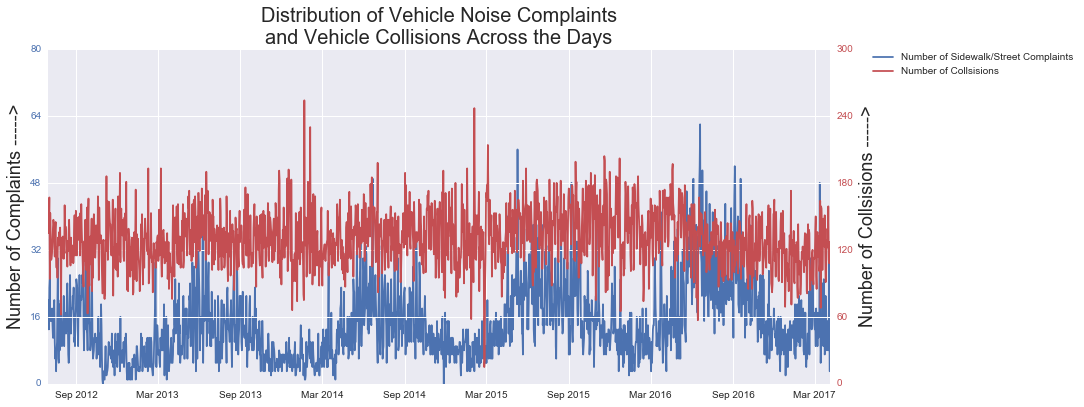

In [37]:
fig, ax1 = plt.subplots(figsize=(14, 6))  

title = ('Distribution of Vehicle Noise Complaints'
         '\nand Vehicle Collisions Across the Days')
plt.title(title, fontsize=20)

g1 = ax1.plot(brooklyn_dist_veh.date, brooklyn_dist_veh.num_complaints, 'b',
              label='Number of Sidewalk/Street Complaints')

ax1.set_ylabel('Number of Complaints ----->', fontsize=18)
ax1.set_ylim(0, 80)
for i in ax1.get_yticklabels():
    i.set_color('b')

ax2 = ax1.twinx()
g2 = ax2.plot(brooklyn_dist_veh.date, brooklyn_dist_veh.num_collisions, 'r',
              label='Number of Collsisions')

ax2.set_ylabel('Number of Collsisions ----->', fontsize=18)
ax2.set_ylim(0, 300)
for i in ax2.get_yticklabels():
    i.set_color('r')
    
lines = g1 + g2
ax1.legend(lines, [l.get_label() for l in lines],
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))

plt.show()

/Users/stormross/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


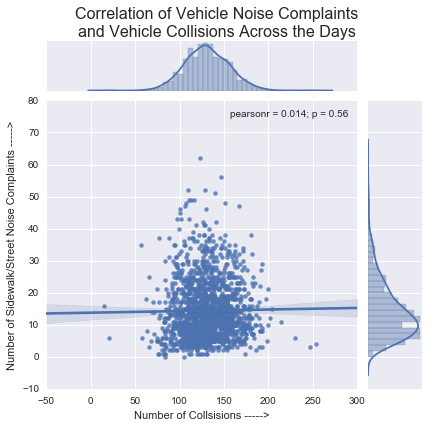

In [38]:
title = ('Correlation of Vehicle Noise Complaints'
         '\nand Vehicle Collisions Across the Days')
g = sns.jointplot(x="num_collisions", y="num_complaints", data=brooklyn_dist_veh, kind='reg')
g.fig.suptitle(title, fontsize=16)
g.fig.subplots_adjust(top=.9)
g.ax_joint.set_xlabel("Number of Collsisions ----->")
g.ax_joint.set_ylabel("Number of Sidewalk/Street Noise Complaints ----->")

No significant correlations between the complaints and collisions in Brooklyn.